**The Human Development Index (HDI) is a statistical indicator that measures a country's progress in three fundamental dimensions: health (life expectancy), education (years of schooling), and standard of living (per capita income). The HDI allows countries to be classified according to their citizens' well-being and level of development, and is considered a better indicator than GDP for measuring a country's progress.**

In [135]:
import pandas as pd

In [164]:
df = pd.read_excel("hdr-data.xlsx")
df

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
0,AFG,Afghanistan,HDI,Human Development Index,NaN,eys,Expected Years of Schooling (years),2023,10.790143,NaN
1,AFG,Afghanistan,HDI,Human Development Index,NaN,gnipc,Gross National Income Per Capita (2021 PPP$),2023,1971.549458,NaN
2,AFG,Afghanistan,HDI,Human Development Index,NaN,hdi,Human Development Index (value),2023,0.496000,NaN
3,AFG,Afghanistan,HDI,Human Development Index,NaN,hdi_rank,HDI Rank,2023,181.000000,NaN
4,AFG,Afghanistan,HDI,Human Development Index,NaN,le,Life Expectancy at Birth (years),2023,66.035000,NaN
...,...,...,...,...,...,...,...,...,...,...
1157,ZWE,Zimbabwe,HDI,Human Development Index,NaN,hdi_rank,HDI Rank,2023,153.000000,NaN
1158,ZWE,Zimbabwe,HDI,Human Development Index,NaN,gnipc,Gross National Income Per Capita (2021 PPP$),2023,3511.463215,NaN
1159,ZWE,Zimbabwe,HDI,Human Development Index,NaN,eys,Expected Years of Schooling (years),2023,11.057453,NaN
1160,ZWE,Zimbabwe,HDI,Human Development Index,NaN,mys,Mean Years of Schooling (years),2023,8.930847,NaN


In [188]:
df["indicatorCode"].unique()

array(['eys', 'gnipc', 'hdi', 'hdi_rank', 'le', 'mys'], dtype=object)

**eys** = Expected Years of Schooling (years)

**gnipc** = Gross National Income Per Capita (2021 PPP$)	

**hdi** = Human Development Index (value)	

**hdi_rank** = HDI Rank

**le** = Life Expectancy at Birth (years)	

**mys** = Mean Years of Schooling (years)

In [165]:
df.isnull().sum()

countryIsoCode       0
country              0
indexCode            0
index                0
dimension         1162
indicatorCode        0
indicator            0
year                 0
value                0
note              1162
dtype: int64

In [166]:
df = df.drop(columns=["dimension", "note"])

In [167]:
df

,countryIsoCode,country,indexCode,index,indicatorCode,indicator,year,value
0,AFG,Afghanistan,HDI,Human Development Index,eys,Expected Years of Schooling (years),2023,10.790143
1,AFG,Afghanistan,HDI,Human Development Index,gnipc,Gross National Income Per Capita (2021 PPP$),2023,1971.549458
2,AFG,Afghanistan,HDI,Human Development Index,hdi,Human Development Index (value),2023,0.496000
3,AFG,Afghanistan,HDI,Human Development Index,hdi_rank,HDI Rank,2023,181.000000
4,AFG,Afghanistan,HDI,Human Development Index,le,Life Expectancy at Birth (years),2023,66.035000
...,...,...,...,...,...,...,...,...
1157,ZWE,Zimbabwe,HDI,Human Development Index,hdi_rank,HDI Rank,2023,153.000000
1158,ZWE,Zimbabwe,HDI,Human Development Index,gnipc,Gross National Income Per Capita (2021 PPP$),2023,3511.463215
1159,ZWE,Zimbabwe,HDI,Human Development Index,eys,Expected Years of Schooling (years),2023,11.057453
1160,ZWE,Zimbabwe,HDI,Human Development Index,mys,Mean Years of Schooling (years),2023,8.930847


In [169]:
df[df["indicatorCode"] == "hdi"].describe()

,year,value
count,193.0,193.000000
mean,2023.0,0.740798
std,0.0,0.151608
min,2023.0,0.388000
25%,2023.0,0.622000
50%,2023.0,0.762000
75%,2023.0,0.862000
max,2023.0,0.972000


In [168]:
# Filter only the HDI indicator
df_hdi = df[df["indicatorCode"] == "hdi"].copy()

df_hdi = df_hdi[["countryIsoCode", "country", "value", "year"]]

df_hdi = df_hdi.rename(columns={"value": "HDI"})

df_hdi

,countryIsoCode,country,HDI,year
2,AFG,Afghanistan,0.496,2023
9,AGO,Angola,0.616,2023
14,ALB,Albania,0.810,2023
21,AND,Andorra,0.913,2023
26,ARE,United Arab Emirates,0.940,2023
...,...,...,...,...
1132,WSM,Samoa,0.708,2023
1143,YEM,Yemen,0.470,2023
1144,ZAF,South Africa,0.741,2023
1155,ZMB,Zambia,0.595,2023


In [171]:
#continent_df = pd.read_csv("https://gist.githubusercontent.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c/raw/13716ceb2f22b5643ce5e7039643c86a0e0c6da6/country-and-continent-codes-list-csv.csv")
#continent_df

In [170]:
import pycountry_convert as pc

# Function to convert ISO code to continent
def country_to_continent(country_code):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_name[continent_code]
    except:
        return None

# Create column with continent
df_hdi["continent"] = df_hdi["countryIsoCode"].apply(country_to_continent)

df_hdi.head()


,countryIsoCode,country,HDI,year,continent
2,AFG,Afghanistan,0.496,2023,Asia
9,AGO,Angola,0.616,2023,Africa
14,ALB,Albania,0.810,2023,Europe
21,AND,Andorra,0.913,2023,Europe
26,ARE,United Arab Emirates,0.940,2023,Asia


In [179]:
df_hdi.isnull().sum()

countryIsoCode    0
country           0
HDI               0
year              0
continent         1
dtype: int64

In [173]:
df_hdi.shape

(193, 5)

In [180]:
#Select the top 5 and bottom 5 by continent

# Top 5 by continent
top_5 = df_hdi.sort_values(by="HDI", ascending=False).groupby("continent").head(5)

# Bottom 5 by continent
bottom_5 = df_hdi.sort_values(by="HDI", ascending=True).groupby("continent").head(5)

In [183]:
top_5.head(10)

,countryIsoCode,country,HDI,year,continent
494,ISL,Iceland,0.972,2023,Europe
777,NOR,Norway,0.970,2023,Europe
182,CHE,Switzerland,0.970,2023,Europe
285,DNK,Denmark,0.962,2023,Europe
266,DEU,Germany,0.959,2023,Europe
50,AUS,Australia,0.958,2023,Oceania
434,HKG,"Hong Kong, China (SAR)",0.955,2023,Asia
915,SGP,Singapore,0.946,2023,Asia
26,ARE,United Arab Emirates,0.940,2023,Asia
177,CAN,Canada,0.939,2023,North America


In [184]:
#Combined dataframe

top_bottom = pd.concat([top_5.assign(category="Top 5"),
                        bottom_5.assign(category="Bottom 5")])

top_bottom = top_bottom.sort_values(["continent", "category", "HDI"], ascending=[True, True, False])


In [186]:
top_bottom.shape

(60, 6)

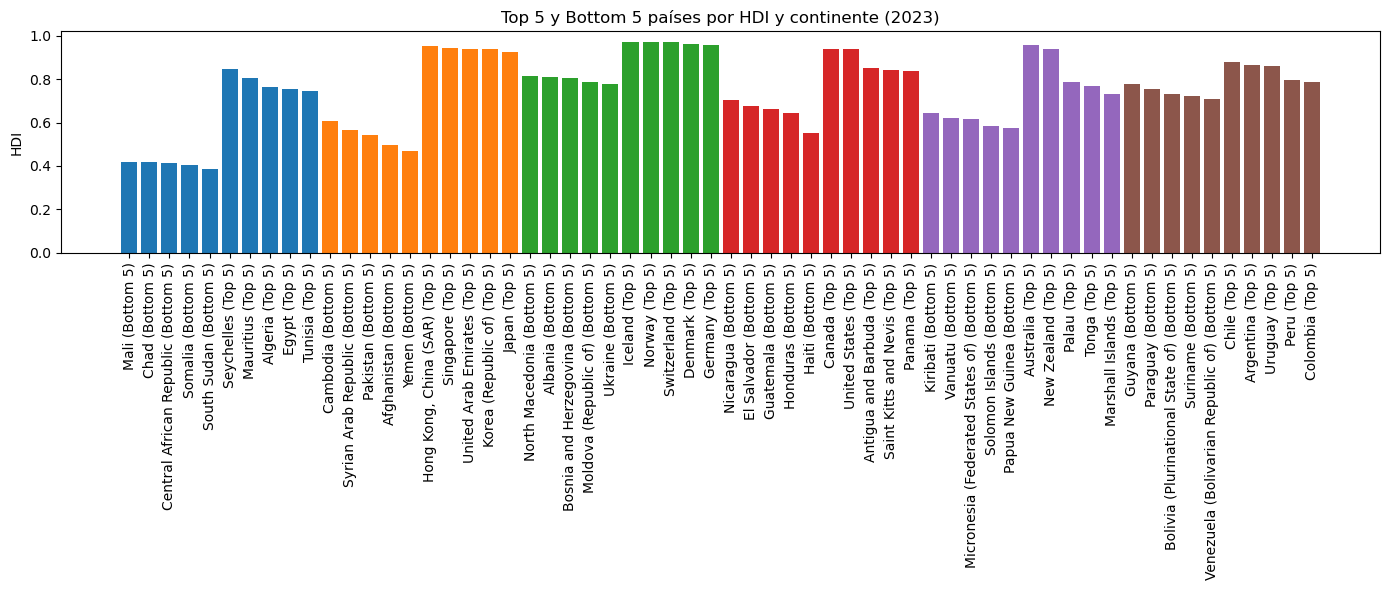

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for continent in top_bottom['continent'].unique():
    subset = top_bottom[top_bottom['continent'] == continent]
    plt.bar(subset['country'] + " (" + subset['category'] + ")", subset['HDI'], label=continent)

plt.xticks(rotation=90)
plt.title("Top 5 y Bottom 5 países por HDI y continente (2023)")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()


In [189]:
top_bottom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 690 to 225
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countryIsoCode  60 non-null     object 
 1   country         60 non-null     object 
 2   HDI             60 non-null     float64
 3   year            60 non-null     int64  
 4   continent       60 non-null     object 
 5   category        60 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ KB


In [190]:
# Create a dictionary of dataframes by continent
dfs_continents = {continent: top_bottom[top_bottom["continent"] == continent].copy() 
                  for continent in top_bottom["continent"].unique()}

# Check the keys
print(dfs_continents.keys())


dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])


In [201]:
dfs_continents['Europe']["countryIsoCode"]

681     MKD
14      ALB
117     BIH
654     MDA
1084    UKR
494     ISL
777     NOR
182     CHE
285     DNK
266     DEU
Name: countryIsoCode, dtype: object

In [194]:
import os

# Create folder to store CSV files
os.makedirs("continents_csv", exist_ok=True)

for continent, df_cont in dfs_continents.items():
    filename = f"continents_csv/{continent.replace(' ', '_')}_HDI_top_bottom.csv"
    df_cont.to_csv(filename, index=False)
    print(f"Saved file: {filename}")


Saved file: continents_csv/Africa_HDI_top_bottom.csv
Saved file: continents_csv/Asia_HDI_top_bottom.csv
Saved file: continents_csv/Europe_HDI_top_bottom.csv
Saved file: continents_csv/North_America_HDI_top_bottom.csv
Saved file: continents_csv/Oceania_HDI_top_bottom.csv
Saved file: continents_csv/South_America_HDI_top_bottom.csv
